<a href="https://colab.research.google.com/github/apoorvyadav1111/Oreilly_Handson_Machine_learning_book/blob/main/Handson_Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit,train_test_split

from zlib import crc32
sns.set()

In [ ]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
df = load_housing_data()
df.head()
housing = df.copy(deep=True)

In [ ]:
#cleaning a bit
#df.dropna(inplace=True)
df = df.loc[df.median_house_value<500000]

In [ ]:
df = load_housing_data()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
np.random.seed(42)
def split_train_test(data,test_ratio=0.2):
  shuffled_indices = np.random.permutation(len(data))
  test_size = int(len(data)*test_ratio)
  test_indices = shuffled_indices[:test_size]
  train_indices = shuffled_indices[test_size:]

  return data.iloc[train_indices],data.iloc[test_indices]

In [ ]:
train,test = split_train_test(df)
print(len(train),len(test))

16512 4128


In [ ]:
def check_test_set(id,test_ratio):
  return crc32(np.int64(id)) & 0xffffffff < test_ratio * 2**32
def split_train_test_by_id(data,test_size,id):
  ids = data[id]
  in_test = ids.apply(lambda x:check_test_set(x,test_size))
  return data.loc[~in_test],data.loc[in_test]

In [ ]:
df_with_id = df.copy(deep=True)
df_with_id['id'] = df['latitude'] + 1000*df['longitude']
train,test = split_train_test_by_id(df_with_id,0.2,"id")

In [ ]:
print(len(train),len(test))

16322 4318


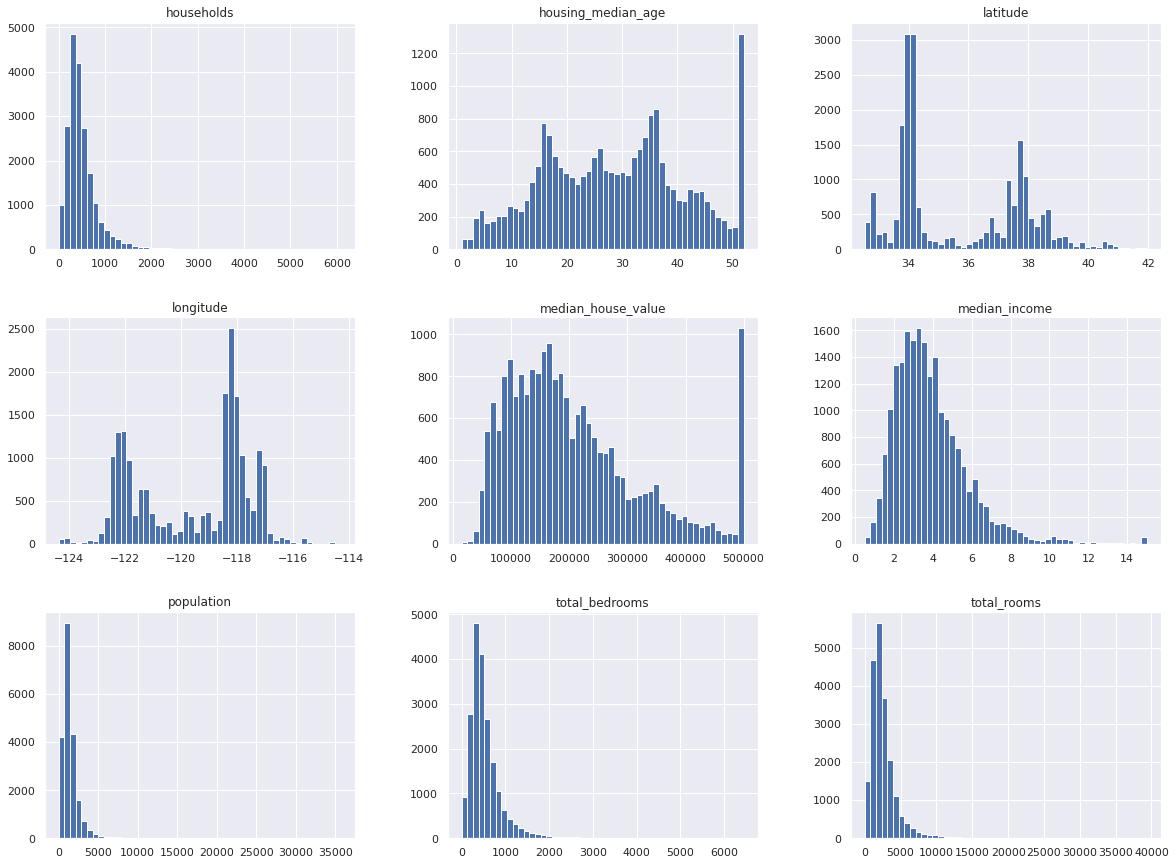

In [ ]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
len(df)

20640

### We can split data using existing module in sklearn

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.2,random_state=42)

In [ ]:
print(len(train),len(test))

16512 4128


### Spliting using strata i.e StratafiedSplit

In [ ]:
df['income_category'] = pd.cut(df['median_income'],bins=[0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

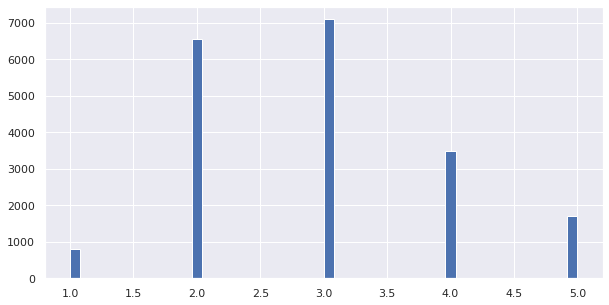

In [ ]:
df['income_category'].hist(bins=50,figsize=(10,5))
plt.show()

In [ ]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_idx,test_idx in split.split(df,df['income_category']):
  strat_train_set = df.iloc[train_idx]
  strat_test_set = df.iloc[test_idx]

In [ ]:
strat_train_set.drop('income_category',axis=1,inplace=True)
strat_test_set.drop('income_category',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND


### Let's do some EDA

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


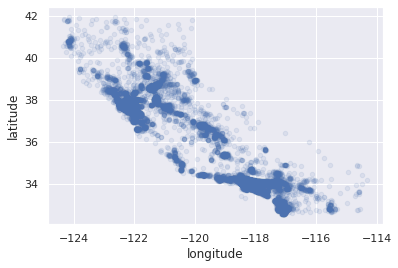

In [ ]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

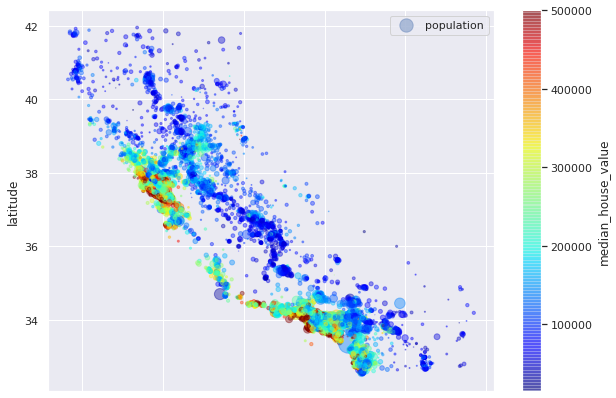

In [ ]:
housing.plot(kind="scatter",
             x="longitude",
             y="latitude",
             alpha=0.4,
             s=housing["population"]/100,
             label="population",
             figsize=(10,7),
             c="median_house_value",
             cmap=plt.get_cmap("jet"),
             colorbar=True,
             )
plt.legend()

In [ ]:
corr_matrix = housing.corr()

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

### Handling missing values


In [ ]:
housing = strat_train_set.copy(deep=True)

In [ ]:
housing.dropna(subset=["total_bedrooms"]) #option 1 dropping records with na

housing.drop("total_bedrooms",axis=1) #option 2 dropping the feature itself

median = housing["total_bedrooms"].median() #filling na with median/mean/mode etc
housing["total_bedrooms"].fillna(median)

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20640, dtype: float64

In [ ]:
##using scikit learn to Impute the values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [ ]:
housing_num = housing.drop("ocean_proximity",axis=1)

In [ ]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
imputer.statistics_ == housing_num.median().values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
X.shape, housing_num.shape

((20640, 9), (20640, 9))

In [ ]:
#now replace this array into original dataset
housing_tr = pd.DataFrame(X,
                          columns=housing_num.columns,
                          index=housing_num.index)

## Handling Categorical Values

In [ ]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer

In [ ]:
housing_cat = housing[['ocean_proximity']]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()
housing_cat_1hot = one_hot.fit_transform(housing_cat)
housing_cat_1hot[:10].toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
one_hot.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
ocean = pd.get_dummies(housing.ocean_proximity)

In [ ]:
len(ocean),len(housing_tr)

(20640, 20640)

In [ ]:
housing_processed = pd.concat([housing_tr.reset_index(drop=True),ocean.reset_index(drop=True)],axis=1)

In [ ]:
housing_processed.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean proximity', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [ ]:
housing_processed.drop(columns='ocean proximity',inplace=True)

In [ ]:
## Custom Transformer

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer

rooms_ix, bedroom_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
  def __init__(self,add_bedrooms_per_room=True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  
  def fit(self,X,y=None):
    return self
  
  def transform(self,X):
    rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
    population_per_household = X[:,population_ix]/X[:,household_ix]

    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:,bedroom_ix]/X[:,rooms_ix]
      return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
    else:
      return np.c_[X,rooms_per_household,population_per_household]

attr_adder = CombinedAttributesAdder(False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
## Creating pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         ('imputer',SimpleImputer(strategy='median')),
                         ('attribs_adder',CombinedAttributesAdder()),
                         ('std_scaler',StandardScaler()),
])

In [ ]:
## Using Column Transformer

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
                                   ('num',num_pipeline,num_attribs),
                                   ('cat',OneHotEncoder(),cat_attribs),
])

#housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
## Training a model
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
pred = lr.predict(some_data_prepared)
print(pred)
print(some_labels)

[296578.83548165 126978.7741049  144704.54733913 200150.88860585
  61715.34929007]
15077    250000.0
15090    112500.0
13187    107300.0
6790     229300.0
12583     78300.0
Name: median_house_value, dtype: float64


In [ ]:
## measuring the model using RMSE
from sklearn.metrics import mean_squared_error
pred = lr.predict(housing_prepared)
loss = mean_squared_error(housing_labels,pred)
loss = np.sqrt(loss)
print(loss)

NameError: ignored

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
pred_tree = tree_reg.predict(housing_prepared)
loss_tree = mean_squared_error(housing_labels,pred_tree)
loss_tree = np.sqrt(loss_tree)
print(loss_tree)

0.0


In [ ]:
#K folds Validation for tree regressor
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [ ]:
print(list(map(int,tree_rmse_scores)))

[63362, 67119, 64681, 67931, 64918, 65113, 62996, 62946, 65938, 65095]


In [ ]:
#K folds Validation for linear regression
lin_scores = cross_val_score(lr,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_scores = np.sqrt(-lin_scores)
print(list(map(int,lin_scores)))

[62396, 61372, 60601, 61878, 55931, 62684, 60108, 58593, 58894, 60975]


In [ ]:
#both are performing bad
from sklearn.ensemble import RandomForestRegressor
fr = RandomForestRegressor()
fr.fit(housing_prepared,housing_labels)
pred = fr.predict(housing_prepared)
fr_loss = mean_squared_error(housing_labels,pred)
fr_loss = np.sqrt(fr_loss)
print(fr_loss)

16750.932990218276


In [ ]:
fr_scores = cross_val_score(fr,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
fr_scores = np.sqrt(-fr_scores)
print(list(map(int,fr_scores)))

[45052, 46251, 45531, 49033, 43382, 45473, 43444, 42973, 45781, 45943]


In [ ]:
##Fine tuning model using Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
              {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

fr = RandomForestRegressor()
grid_search = GridSearchCV(fr,
                           param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True
                           )

grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
best_fr = grid_search.best_estimator_

In [ ]:
pred = grid_search.predict(housing_prepared)
new_loss = np.sqrt(mean_squared_error(housing_labels,pred))
print(new_loss)

17549.521503463828


In [ ]:
##Lets run our model on test set
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop(columns='median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy(deep=True)

X_test_processed = full_pipeline.transform(X_test)

y_pred = final_model.predict(X_test_processed)
test_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(test_rmse)

43614.34568105612


## Chapter-2 Exercise
### Question 1 
Try a Support Vector Machine regressor (sklearn.svm.SVR) with various hyperparameters, 
such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" 
(with various values for the C and gamma hyperparameters).

Don’t worry about what these hyperparameters mean for now. How does the best SVR predictor perform?


In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(housing_prepared,housing_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = svr.predict(housing_prepared)
svr_loss = np.sqrt(mean_squared_error(housing_labels,y_pred))
print(svr_loss)

98891.72827556646


In [ ]:
svr_params_grid = [
                   {'kernel':['linear'],'C':[0.1,1,10]},
                   {'kernel':['rbf'],'C':[0.1,1,10],'gamma':[0.1,10,100]},
]
svr_grid_search = GridSearchCV(svr,
                               svr_params_grid,
                               cv=5,
                               scoring ='neg_mean_squared_error',
                               return_train_score=True,
                               n_jobs=-1,
                               verbose=1)

In [ ]:
svr_grid_search.fit(housing_prepared,housing_labels)

### Question 2. 

Try replacing GridSearchCV with RandomizedSearchCV.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

svr_random_search = RandomizedSearchCV(svr,
                                       svr_params_grid,
                                       cv = 5,
                                       scoring = 'neg_mean_squared_error',
                                       return_train_score=True,
                                       verbose=1,
                                       n_jobs=-1,
                                       n_iter=6
)

In [ ]:
svr_random_search.fit(housing_prepared,housing_labels)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=6, n_jobs=-1,
                   param_distributions=[{'C': [0.1, 1, 10],
                                         'kernel': ['linear']},
                                        {'C': [0.1, 1, 10],
                                         'gamma': [0.1, 10, 100],
                                         'kernel': ['rbf']}],
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
np.sqrt(-svr_random_search.best_score_)

71911.49195659522

### Question 3. 

Try adding a transformer in the preparation pipeline to select only the most important attributes.


In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin

def indices_of_top_k(arr,k):
  return np.sort(np.argpartition(np.array(arr),-k)[-k:])

class TopFeatureSelector(BaseEstimator,TransformerMixin):
  def __init__(self,feature_importances,k):
    self.feature_importances = feature_importances
    self.k = k
  
  def fit(self,X,y=None):
    self.feature_indices_ = indices_of_top_k(self.feature_importances,self.k)
    return self
  
  def transform(self,X):
    return X[:,self.feature_indices_]

In [ ]:
k = 5
feature_importances = grid_search.best_estimator_.feature_importances_

In [ ]:
top_k_feature_indices = indices_of_top_k(feature_importances,k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12])

In [ ]:
prep_and_feature_selection_pipeline = Pipeline([
                                                ('preparation',full_pipeline),
                                                ('feature_selection',TopFeatureSelector(feature_importances,k))
])

In [ ]:
housing_prepared_k = prep_and_feature_selection_pipeline.fit_transform(housing)

### Question 4.


Try creating a single pipeline that does the full data preparation plus the final prediction.


In [ ]:
prep_select_pred = Pipeline([
                             ('prep_and_select',prep_and_feature_selection_pipeline),
                             ('prediction',SVR(**svr_random_search.best_params_))
])

In [ ]:
prep_select_pred.fit(housing,housing_labels)

Pipeline(memory=None,
         steps=[('prep_and_select',
                 Pipeline(memory=None,
                          steps=[('preparation',
                                  ColumnTransformer(n_jobs=None,
                                                    remainder='drop',
                                                    sparse_threshold=0.3,
                                                    transformer_weights=None,
                                                    transformers=[('num',
                                                                   Pipeline(memory=None,
                                                                            steps=[('imputer',
                                                                                    SimpleImputer(add_indicator=False,
                                                                                                  copy=True,
                                                                                 

## Exercise 5:
Build a spam classifier using Apache SpamAssasin public datasets